In [3]:
!pip install python-sofa

In [6]:
import sofa
print(sofa)

<module 'sofa' from 'C:\\Users\\baris\\anaconda3\\Lib\\site-packages\\sofa\\__init__.py'>


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline

In [8]:
def plot_coordinates(coords, title):
    x0 = coords
    n0 = coords
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    q = ax.quiver(x0[:, 0], x0[:, 1], x0[:, 2], n0[:, 0],
                  n0[:, 1], n0[:, 2], length=0.1)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(title)
    return q


APIName: ARI SOFA API for Matlab/Octave
APIVersion: 1.0.3
AuthorContact: fabian.brinkmann@mailbox.org; manoj.fma@gmail.com
Conventions: SOFA
DataType: FIR
DatabaseName: HUTUBS
DateCreated: 2018-09-17 15:28:14
DateModified: 2018-10-23 16:06:31
License: cc-by 4.0 (https://creativecommons.org/licenses/by/4.0/)
ListenerShortName: pp1
Organization: Audio Communication Group, Technical University Berlin; HUAWEI Munich Research Center; Sennheiser
RoomType: free field
SOFAConventions: SimpleFreeFieldHRIR
SOFAConventionsVersion: 1.0
Title: head-related impulse responses
Version: 1.0


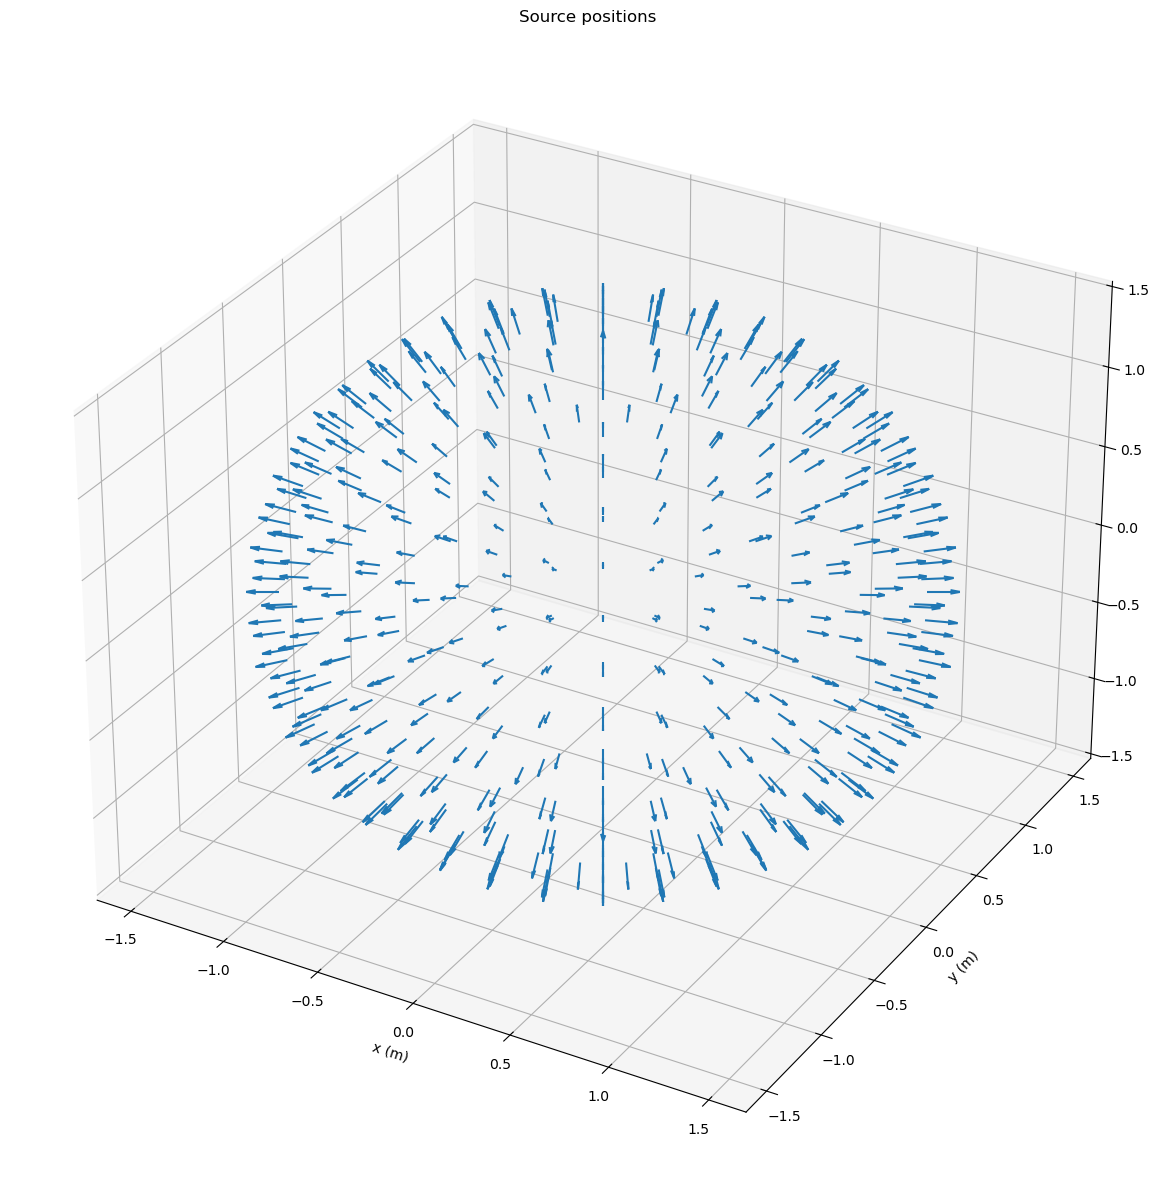

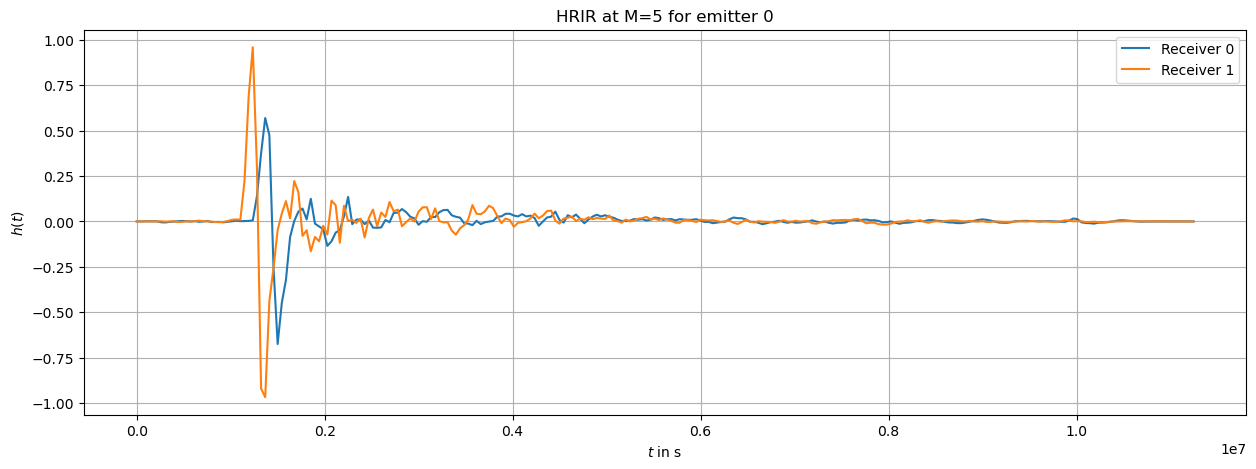

In [9]:
HRTF_path = "HRIRs/pp1_HRIRs_measured.sofa"
HRTF = sofa.Database.open(HRTF_path)
HRTF.Metadata.dump()

# plot Source positions
source_positions = HRTF.Source.Position.get_values(system="cartesian")
plot_coordinates(source_positions, 'Source positions');

# plot Data.IR at M=5 for E=0
measurement = 5
emitter = 0
legend = []

t = np.arange(0,HRTF.Dimensions.N)*HRTF.Data.SamplingRate.get_values(indices={"M":measurement})

plt.figure(figsize=(15, 5))
for receiver in np.arange(HRTF.Dimensions.R):
    plt.plot(t, HRTF.Data.IR.get_values(indices={"M":measurement, "R":receiver, "E":emitter}))
    legend.append('Receiver {0}'.format(receiver))
plt.title('HRIR at M={0} for emitter {1}'.format(measurement, emitter))
plt.legend(legend)
plt.xlabel('$t$ in s')
plt.ylabel(r'$h(t)$')
plt.grid()

HRTF.close()
